# Convolutions and Dimensions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline


In [58]:
pip install opencv-python

     ---------------------------------------- 35.4/35.4 MB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Convlutions 
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

**Answer** <br>
k1: Identity filter<br> 
k2: Shift right by one pixel<br> 
k3: Ridge detection <br> 
k4: Blur (with a mean filter)

#### Apply to arrays
Apply the convolutions above to the following array, using numpy:


In [3]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

k1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
k2 = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]])
k3 = np.array([[-1,-1, -1], [-1, 8, -1], [-1, -1, -1]])
k4_ = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
k4 = np.multiply( k4_,  1/9)

In [4]:
# Write your answer here
import scipy.ndimage as ndi

print('x * k1 =')
print(ndi.correlate(x, k1),end='\n\n')
print('x * k2 =')
print(ndi.correlate(x, k2),end='\n\n')
print('x * k3 =')
print(ndi.correlate(x, k3),end='\n\n')
print('x * k4 =')
print(ndi.correlate(x, k1))

x * k1 =
[[-1 -3 -4  0 -1]
 [ 2 -2 -4  0 -2]
 [-3 -2  2  2  3]
 [ 0 -3 -4 -4 -2]
 [-4 -2  2  0  1]]

x * k2 =
[[-3 -4  0 -1 -1]
 [-2 -4  0 -2 -2]
 [-2  2  2  3  3]
 [-3 -4 -4 -2 -2]
 [-2  2  0  1  1]]

x * k3 =
[[ -1  -7 -16  16  -1]
 [ 29  -3 -25   4 -20]
 [-18  -4  33  27  31]
 [ 21 -13 -27 -36 -20]
 [-13  -3  29   4  13]]

x * k4 =
[[-1 -3 -4  0 -1]
 [ 2 -2 -4  0 -2]
 [-3 -2  2  2  3]
 [ 0 -3 -4 -4 -2]
 [-4 -2  2  0  1]]


#### Apply to images
Apply the convolution filters above on the image. You should convert the image to grayscale, and apply the filters on the grayscale image. 
Show the results:

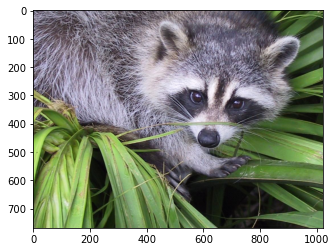

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
face = scipy.misc.face()
plt.imshow(face); plt.show()

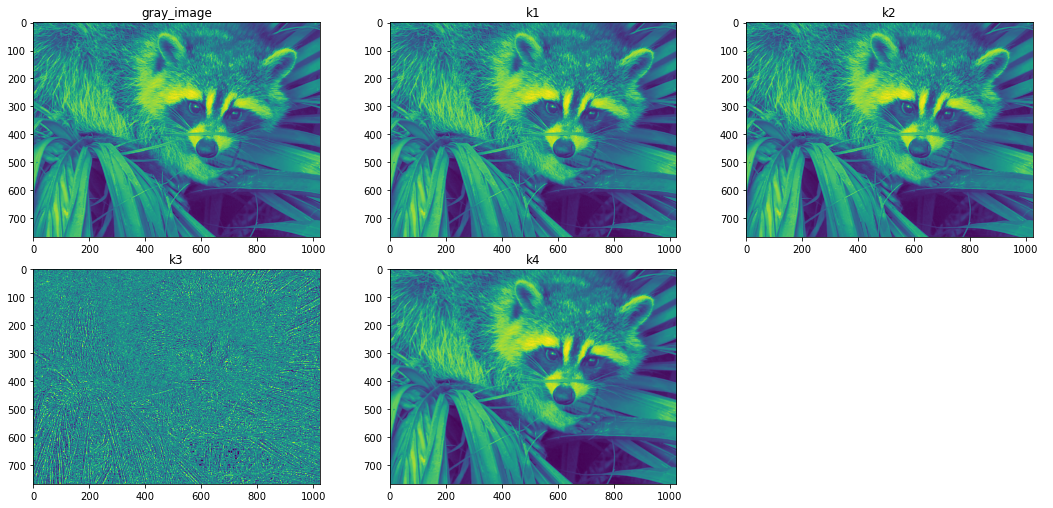

In [134]:
# Write your answer here
from skimage import color
from PIL import Image
import cv2

# gray_image = face.dot([0.07, 0.72, 0.21])
# gray_image = face.convert('L')
# gray_image = color.rgb2gray(face)
gray_image = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_image); plt.title('grayscale'); plt.show()

# outputs = scipy.ndimage.convolve(gray_image, k3)

k1_image = ndi.correlate(gray_image, k1)
k2_image = ndi.correlate(gray_image, k2)
k3_image = ndi.correlate(gray_image, k3)
k4_image = ndi.correlate(gray_image, k4)

# plt.figure(figsize=(8, 10))
fig, axs = plt.subplots(2, 3,figsize=(15,7))
fig.tight_layout()
axs[0, 0].imshow(gray_image)
axs[0, 0].set_title('gray_image')
axs[0, 1].imshow(k1_image)
axs[0, 1].set_title('k1')
axs[0, 2].imshow(k2_image)
axs[0, 2].set_title('k2')
axs[1, 0].imshow(k3_image)
axs[1, 0].set_title('k3')
axs[1, 1].imshow(k4_image)
axs[1, 1].set_title('k4')
axs[-1, -1].axis('off')
plt.show()

## Dimensions

What would be the output dimensions in these cases (input size is NxN)?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account the padding option and the stride. 

'Zero padding' means that we padded by floor(kernel_sz/2) in every dimension

### Answer
C = ((n-f+2p)/s)+1 <br>
C is the size of the convoluted matrix <br>
n is the size of the input matrix <br>
f is the size of the filter matrix <br>
p is the Padding amount <br>
s is the Stride applied <br>

**1.**<br>
p=0  s=1 n= N <br>
3x3 => f=3 => C = (N-3)+1=N-2 ==> Therefore the size of the convoluted matrix is (N-2) X (N-2) <br> 
5x5 => f=5 => C = (N-5)+1=N-4 ==> Therefore the size of the convoluted matrix is (N-4) X (N-4) <br> 
7x7 => f=7 => C = (N-7)+1=N-6 ==> Therefore the size of the convoluted matrix is (N-6) X (N-6) <br><br> 
**2.**<br>
p=0  s=2 n= N <br>
3x3 => f=3 => C = (N-3)/2+1 ==> Therefore the size of the convoluted matrix is ((N-3)/2+1) X ((N-3)/2+1)) <br>
5x5 => f=5 => C = (N-5)/2+1 ==> Therefore the size of the convoluted matrix is ((N-5)/2+1) X ((N-5)/2+1) <br>
7x7 => f=7 => C = (N-7)/2+1 ==> Therefore the size of the convoluted matrix is ((N-7)/2+1) X ((N-7)/2+1) <br><br>

**3.**<br>
p=floor(kernel_sz/2) s=1 n= N <br>
3x3 => f=3 => p=floor(3/2)=1 ==> C = (N-3+2)+1=N ==> Therefore the size of the convoluted matrix is N x N <br>
5x5 => f=5 => p=floor(5/2)=2 ==>C = (N-5+4)+1=N ==> Therefore the size of the convoluted matrix is N x N <br>
7x7 => f=7 => p=floor(7/2)=3 ==>C = (N-7+6)+1=N ==> Therefore the size of the convoluted matrix is N x N <br><br>

**4.**<br>
p=floor(kernel_sz/2) s=2 n= N <br>
3x3 => f=3 => p=floor(3/2)=1 ==> C = ((N-3+2)/2)+1=((N-1)/2)+1 ==> Therefore the size of the convoluted matrix is (((N-1)/2)+1) x (((N-1)/2)+1) <br>
5x5 => f=5 => p=floor(5/2)=2 ==> C = ((N-5+4)/2)+1=((N-1)/2)+1 ==> Therefore the size of the convoluted matrix is (((N-1)/2)+1) x (((N-1)/2)+1) <br>
7x7 => f=7 => p=floor(7/2)=3 ==> C = ((N-7+6)/2)+1=((N-1)/2)+1 ==> Therefore the size of the convoluted matrix is (((N-1)/2)+1) x (((N-1)/2)+1) <br><br>

### Network dimensions
Write below the dimensions, the number of parameters and the number of calculations made in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).

Please write in this this format: (C,W,H) -> (#channels, width, height)


### Answer
Assumptions:  Input layer size: (28 × 28 × 1)  - grayscale <br>
Convolutions calculations = FLOPs = 2x Number of Kernel x Kernel Shape x Output Shape <br>
Pooling calculations = FLOPs = (Height / Stride) x Depth x (Width / Stride) of an image <br>
Dense calculations = Flops = input_shape * output_shape + output_shape
$output=\frac{(inputsize - kernelsize + 2 * padding)}{stride }+1$  <br>

**CNN1:** <br>
output = (28 - 2)/1 + 1 = 24 ==> dimension = (32,24,24)    <br>
param_number = (kernel_height * kernel_width * input_channel_number + 1) * output_channel_number <br>
==> number of parameters = (5 * 5 * 1 + 1) * 32 = 832 <br>
FLOPs = 2 * 32 * 5 * 5 * 24 * 24 = 921600 <br>

**Pooling1:** <br>
output = (24 - 2)/2 + 1 = 12 ==> dimension = (32,12,12)<br>
number of parameters = 0 <br>
FLOPs = 32 * 12 * 12 / (2 * 2) = 1152 <br>


**CNN2:** <br>
output = (12 - 5)/1 + 1 = 8 ==> dimension = (64,8,8)    <br>
number of parameters = (5 * 5 * 32 + 1) * 64 = 51264 <br>
FLOPs = 2 * 64 * 5 * 5 * 8 * 8 = 204800 <br>

**Pooling1:** <br>
output = (8 - 2)/2 + 1 = 4 ==> dimension = (64,4,4)<br>
number of parameters = 0 <br>
FLOPs = 64 * 4 * 4 / (2 * 2) = 256 <br>

**Dense1:** <br>
dimension = (1024,4,4)      (drop-out?) <br>
param_number = output_channel_number * (input_channel_number + 1) <br>
==> number of parameters = 1024 * (64+1) = 66560 <br>
FLOPs = 1024 * (64+1) = 66560 <br>

**Dense2:** <br>
dimension = (10,4,4) <br>
number of parameters = 10 * (1024+1) = 10250        <br>
FLOPs = 1024 * (64+1) = 66560 <br>